In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

Kernel: linear, Accuracy: 0.75
Kernel: poly, Accuracy: 0.68
Kernel: rbf, Accuracy: 0.75
Kernel: sigmoid, Accuracy: 0.67


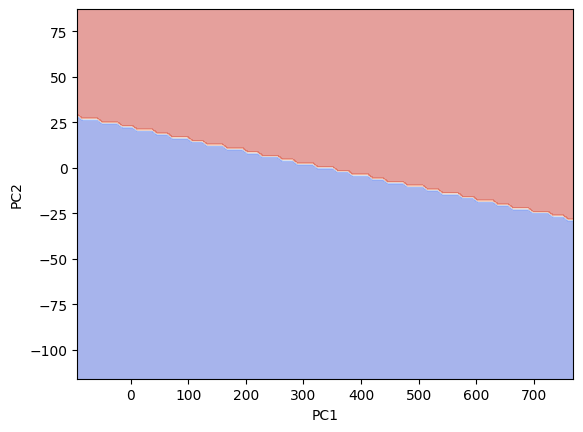

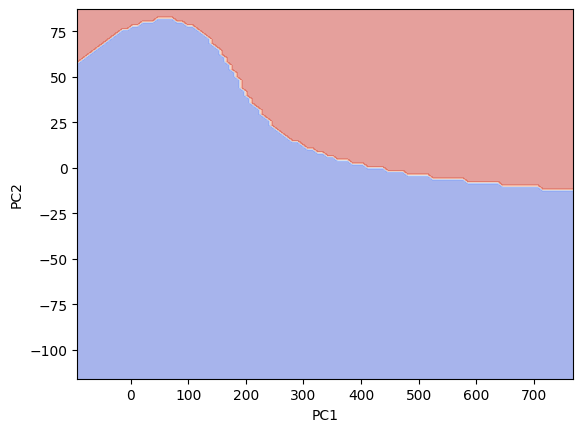

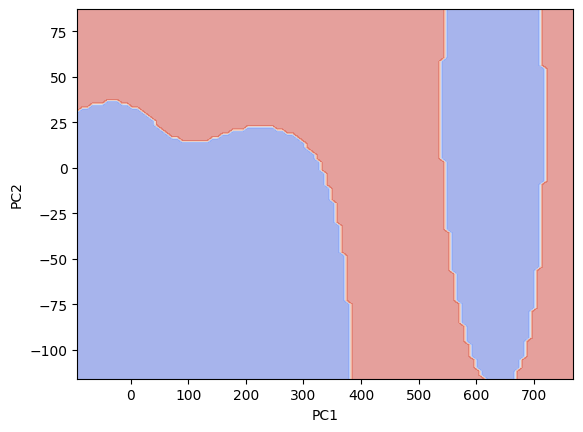

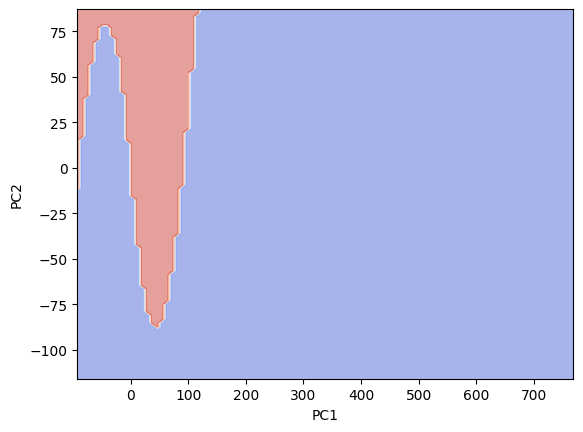

In [9]:
kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    model = SVC(kernel=kernel, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Kernel: {kernel}, Accuracy: {accuracy:.2f}")

    # Plotting decision boundary
    ax = DecisionBoundaryDisplay.from_estimator(
        model,
        X_train,
        response_method="predict",

        # these are optional
        cmap="coolwarm",
        alpha=0.5,
        ax=None,
        xlabel="PC1",
        ylabel="PC2",
    )